<a href="https://colab.research.google.com/github/ravishankarramakrishnan/Deep_Learning_Practice/blob/master/0_CNN_Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Canadian Institute for Advanced Research - 6k images (Low res 32*32 size) of each class consisting 60k images of 10 class, Well balanced Dataset

# Logic

# Image Matrix + Feature Detector => Feature Map
# Relu is included for adding Non - Linearity to Feature Map and enhancing the sparsity of Features (Scattering of Feature Map)
# Dropout is used as Regularisation technique to avoid Overfitting (Codependancy among neurons)

# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Deep Learning Libraries

from keras.datasets import cifar10

# Loading the Data - Tuple Unpacking

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


In [0]:
# Shape of data

X_train.shape  #32 Rows, 32 Columns, 3 Channels [RGB]

(50000, 32, 32, 3)

In [0]:
X_test.shape

(10000, 32, 32, 3)

In [0]:
y_train.shape

(50000, 1)

In [0]:
y_test.shape

(10000, 1)

[1]


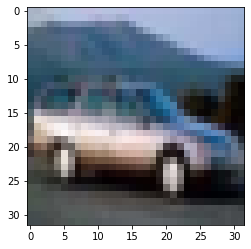

In [0]:
# Data Visualisation

# Visualise 5th image and its label

plt.imshow(X_train[4])
print(y_train[4])

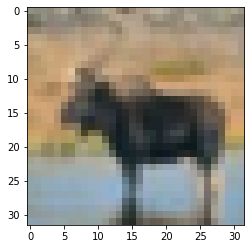

[4]
******************************




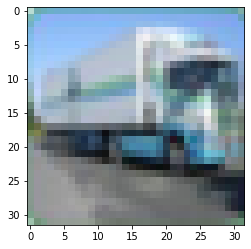

[9]
******************************




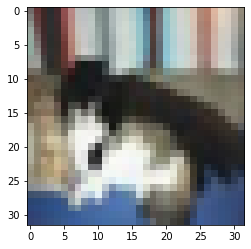

[3]
******************************




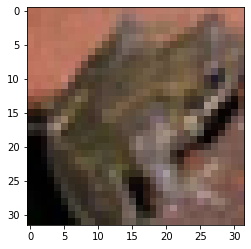

[6]
******************************




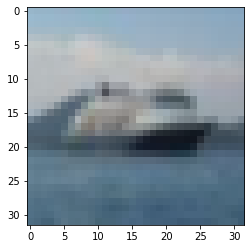

[8]
******************************




In [0]:
for _ in range(5):
  a = np.random.randint(1,5000)
  a = int(a)
  plt.imshow(X_train[a])
  plt.show()
  print(y_train[a])
  print('*'*30)
  print('\n')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


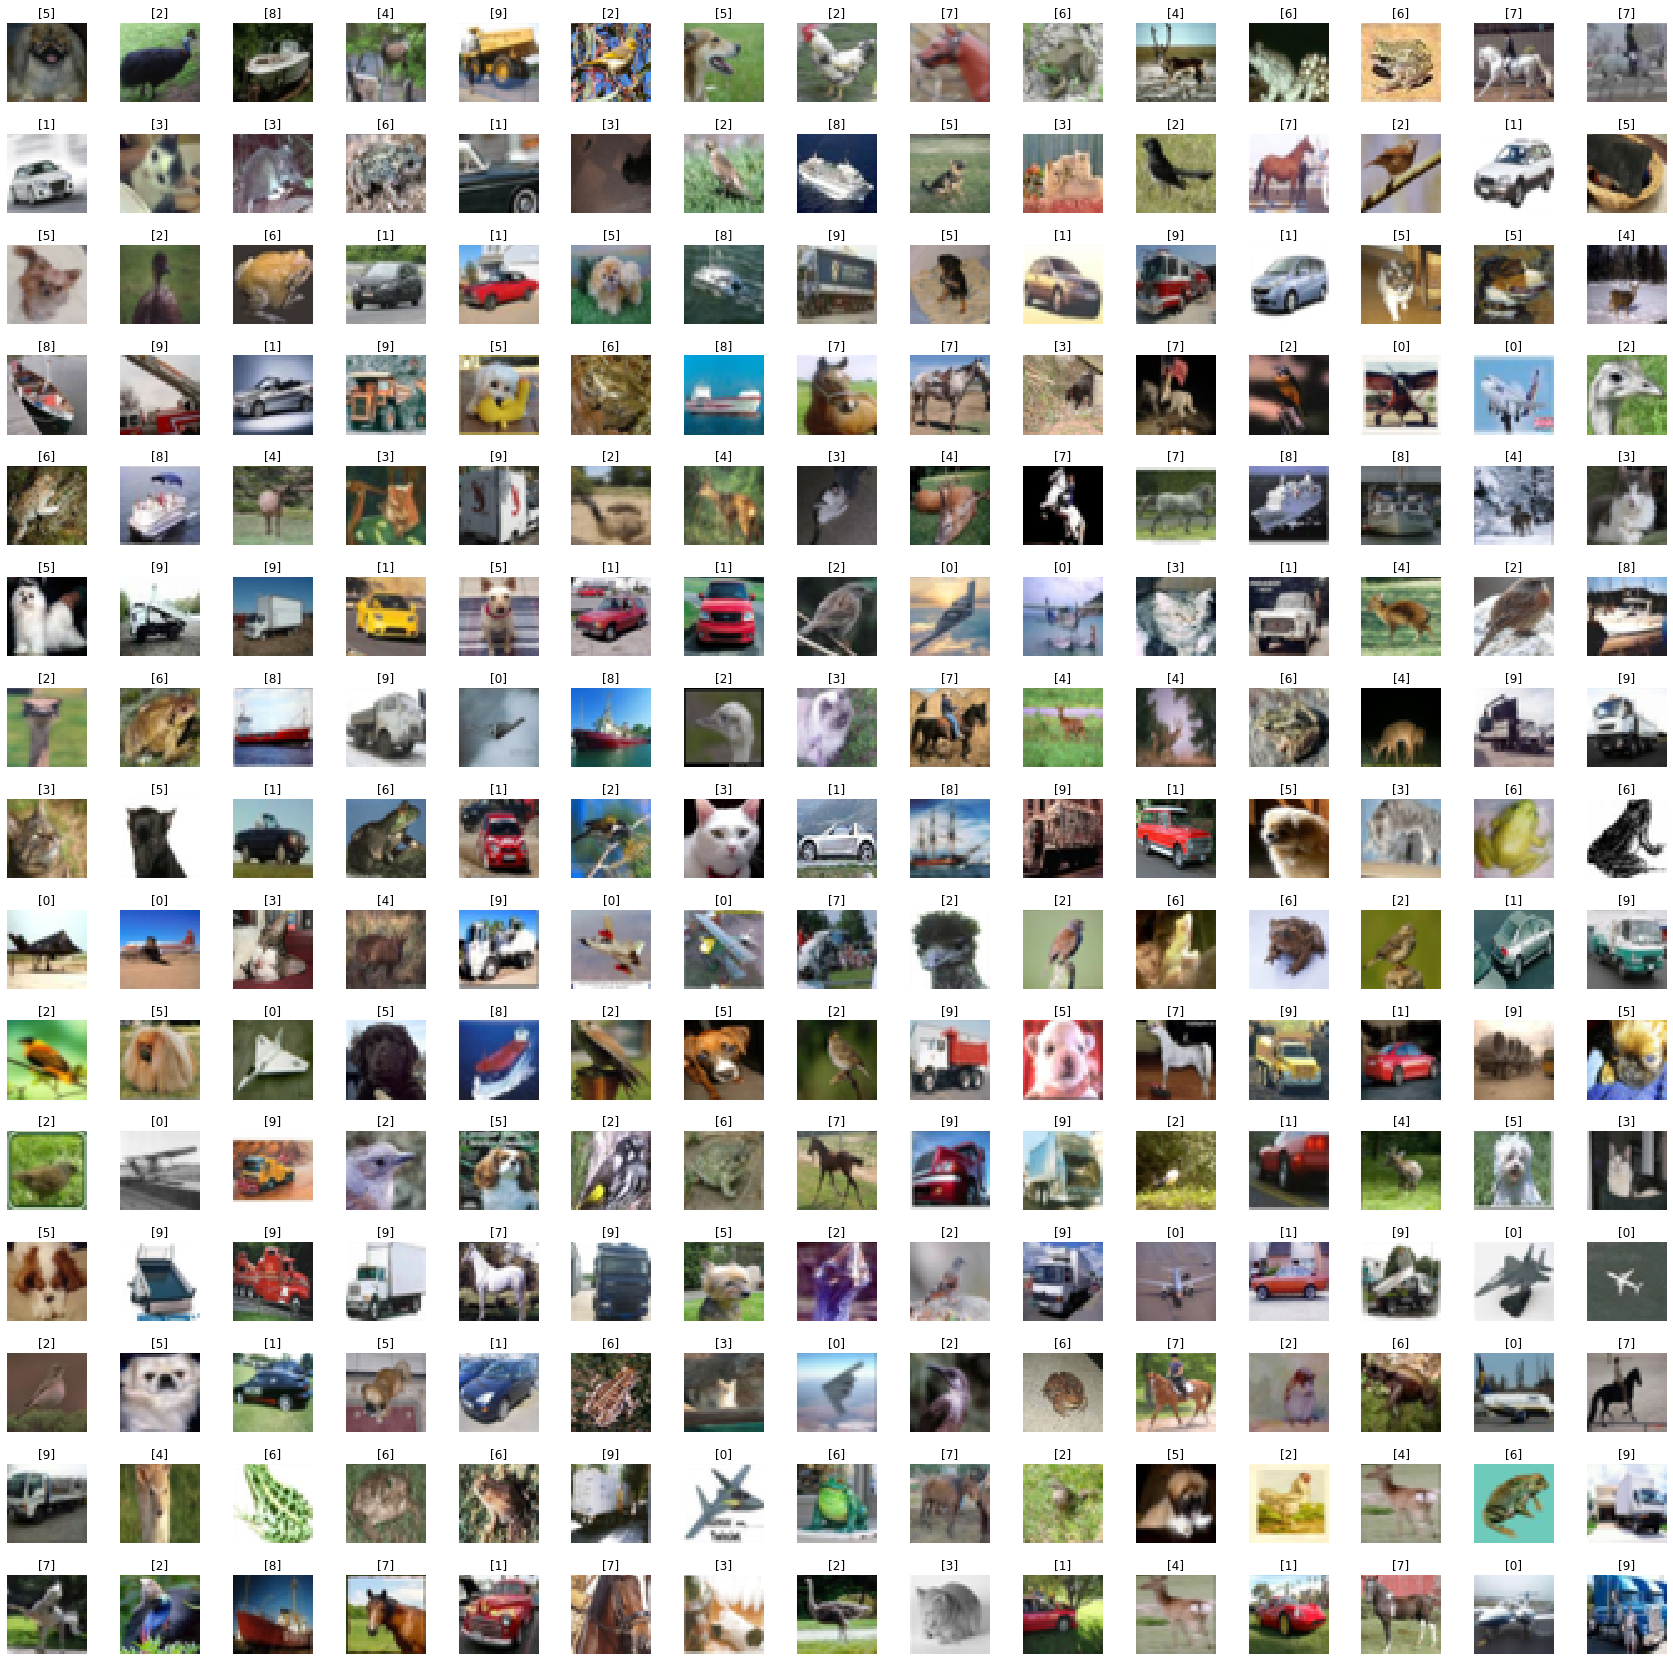

In [0]:
# Show Multiple Images gridwise - Creating a Base Grid so that afterwords use for loop to fill it

W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (30,30))
axes = axes.ravel() # flatten the matrix into 225 arrays [15*15]  

n_train = len(X_train)

# Fill the Grid Images

for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(X_train[index])
    # Add Label as title
    axes[i].set_title(y_train[index])
    # Remove axes of all images
    axes[i].axis('off')
  
# Set Horizontal Space for each plots
plt.subplots_adjust(hspace= 0.4)
    

In [0]:
# Data Preparation

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

In [0]:
number_categories = 10

In [0]:
# Convert Target variable from decimal to binary format

import keras

y_train = keras.utils.to_categorical(y_train, number_categories)
y_test = keras.utils.to_categorical(y_test, number_categories)

In [0]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [0]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
X_train[:2]

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [0]:
# Perform Data Normalisation (0 - 1 instead of 0 - 255)

X_train = X_train/255
X_test = X_test/255

In [0]:
X_train[:2]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [0]:
# Get the Input shape and dimension [32*32*3]

print(X_train.shape)

Input_shape = X_train.shape[1:] 

print(Input_shape)


(50000, 32, 32, 3)
(32, 32, 3)


In [0]:
# Training the Model

# Import Deep Learning Libraries

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
# Initiate as per Sequence

model = Sequential()

# Building First Convolution Layer

model.add(Conv2D(filters=64, kernel_size= (3,3), activation= 'relu', input_shape = Input_shape))

# Building Second Convolution Layer

model.add(Conv2D(filters=64, kernel_size= (3,3), activation= 'relu'))

# Adding Max Pooling

model.add(MaxPooling2D(pool_size= (2,2)))

# Add Dropout

model.add(Dropout(0.3))

# Build Another Layer of Convolution with 128 filters - To increase the Depth of the Neural Networks

model.add(Conv2D(filters=128, kernel_size= (3,3), activation= 'relu'))
model.add(Conv2D(filters=128, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.2))

# Flatten the Model

model.add(Flatten())

# Add Dense Fully Connected Layer

model.add(Dense(units=1024, activation='relu'))

# Add another Hidden Layer

model.add(Dense(units=1024, activation='relu'))

# Add Output Layer

model.add(Dense(units = 10, activation= 'softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Compiling and Fitting the Data

model.compile(loss= 'categorical_crossentropy', optimizer= keras.optimizers.RMSprop(lr = 0.001), metrics=['accuracy'])

# Fit training data to Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size= 128, epochs = 100, shuffle= True)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/100





50000/50000 [==============================] - 21s 410us/step - loss: 1.7956 - acc: 0.3497 - val_loss: 1.3786 - val_acc: 0.4946
Epoch 2/100
50000/50000 [==============================] - 6s 128us/step - loss: 1.2228 - acc: 0.5704 - val_loss: 0.9745 - val_acc: 0.6558
Epoch 3/100
50000/50000 [==============================] - 6s 127us/step - loss: 0.9375 - acc: 0.6746 - val_loss: 0.7964 - val_acc: 0.7265
Epoch 4/100
50000/50000 [==============================] - 6s 128us/step - loss: 0.7611 - acc: 0.7353 - val_loss: 0.8046 - val_acc: 0.7243
Epoch 5/100
50000/50000 [==============================] - 6s 127us/step - loss: 0.6319 - acc: 0.7822 - val_loss: 0.8003 - val_acc: 0.7350
Epoch 6/100
50000/50000 [==============================] - 6s 128us/step - loss: 0.5534 - acc: 0.8108 - val_loss: 0.7848 - val_acc: 0.7634
Epoch 7/100

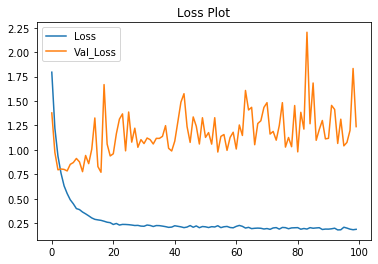

In [0]:
# Plot what's Returned by model.fit()

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['val_loss'], label="Val_Loss")
plt.title("Loss Plot")
plt.legend();

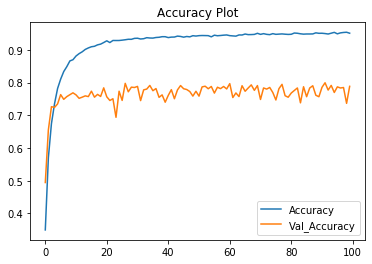

In [0]:
# Plot the Accuracy
plt.plot(history.history['acc'], label="Accuracy")
plt.plot(history.history['val_acc'], label="Val_Accuracy")
plt.title("Accuracy Plot")
plt.legend();


In [0]:
# Model Evaluation

evals = model.evaluate(X_test, y_test)
print("The Test accuracy is: {}".format(evals[1]))

10000/10000 [==============================] - 1s 100us/step
The Test accuracy is: 0.7887


In [0]:
# Prediction

pred_class = model.predict_classes(X_test)

In [0]:
pred_class

array([3, 8, 1, ..., 5, 1, 7])

In [0]:
# Compating Prediction to Ground Truth

# Return Y_test from Sparse to max value (Boolean to Decimal for Comparison)

y_test = y_test.argmax(1)

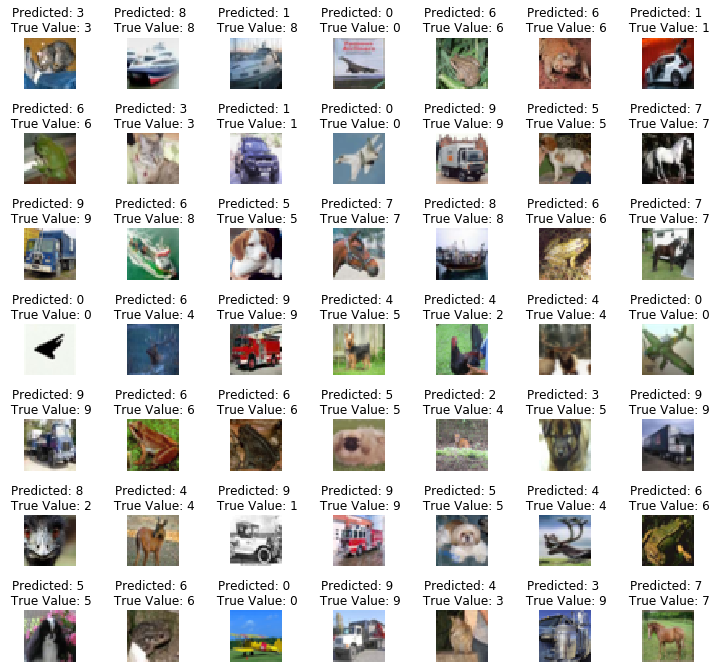

In [0]:
# Show the Matrix

leng = 7
wid = 7
fig, axes = plt.subplots(leng, wid, figsize = (12,12))
axes = axes.ravel()

# Loop through and check Multiclass values

for i in np.arange(0, leng*wid):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Predicted: {} \n True Value: {}'.format(pred_class[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace= 1)

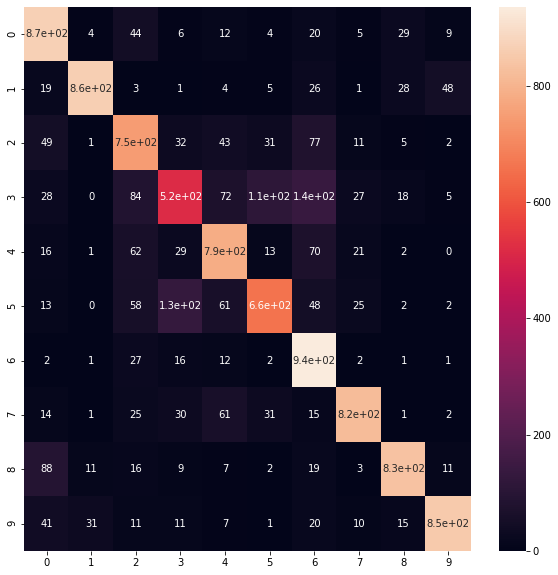

In [0]:
# Use Confusion Matrix to Summarize

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_class)

plt.figure(figsize= (10,10))

sns.heatmap(cm, annot= True)